In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from cmdstanpy import CmdStanModel
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import arviz as az

import multiprocessing
num_cpu = multiprocessing.cpu_count()
num_cpu

12

In [4]:
df = pd.read_csv("data/data-attendance-1.txt")
df.head()

,A,Score,Y
0,0,69,0.286
1,1,145,0.196
2,0,125,0.261
3,1,86,0.109
4,1,158,0.230


/home/karinog/miniconda3/envs/cmdstanpy/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


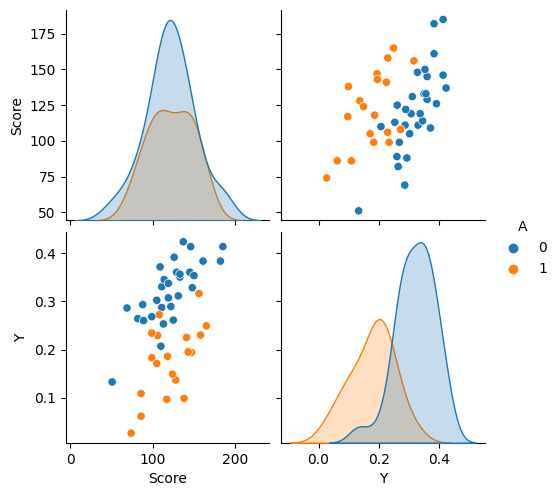

In [6]:
sns.pairplot(df, hue="A")
plt.show()

In [7]:
model = CmdStanModel(stan_file="models/MLR_basic2.stan")

17:33:34 - cmdstanpy - INFO - compiling stan file /home/karinog/work/study/09_cmdstanpy/models/MLR_basic2.stan to exe file /home/karinog/work/study/09_cmdstanpy/models/MLR_basic2
17:33:46 - cmdstanpy - INFO - compiled model executable: /home/karinog/work/study/09_cmdstanpy/models/MLR_basic2


In [9]:
df.shape[0], len(df)

(50, 50)

In [12]:
df.columns

Index(['A', 'Score', 'Y'], dtype='object')

In [11]:
X_list = ["A","Score"]

In [18]:
mms = MinMaxScaler()
df[X_list] = mms.fit_transform(df[X_list])

In [19]:
data_input = {
    "N": len(df),
    "K": len(X_list),
    "X": df[X_list].values,
    "y": df["Y"].values,
}
fit = model.sample(
    data=data_input,
    chains=4,
    seed=123,
    iter_warmup=1000,
    iter_sampling=2000,
    parallel_chains=4,
    thin=1,
)

18:05:20 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |█████▋    | 00:00 Iteration: 1500 / 3000 [ 50%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


18:05:20 - cmdstanpy - INFO - CmdStan done processing.
18:05:20 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/karinog/work/study/09_cmdstanpy/models/MLR_basic2.stan', line 20, column 3 to column 25)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/karinog/work/study/09_cmdstanpy/models/MLR_basic2.stan', line 20, column 3 to column 25)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/karinog/work/study/09_cmdstanpy/models/MLR_basic2.stan', line 20, column 3 to column 25)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/home/karinog/work/study/09_cmdstanpy/models/MLR_basic2.stan', line 20, column 3 to column 25)
Consider re-running with show_console=True if the above output is unclear!


In [20]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,120.864000,0.027279,1.451900,118.052000,121.182000,122.558000,2832.820000,3929.01000,1.000820
alpha,0.206243,0.000358,0.021068,0.171173,0.206456,0.240498,3454.960000,4791.89000,0.999967
beta[1],-0.144092,0.000200,0.014810,-0.168239,-0.144000,-0.119887,5479.210000,7599.46000,1.000940
beta[2],0.217907,0.000597,0.035739,0.160341,0.217231,0.277963,3583.410000,4970.06000,0.999756
sigma,0.051702,0.000073,0.005429,0.043621,0.051266,0.061459,5500.300999,7628.71151,1.000585
...,...,...,...,...,...,...,...,...,...
y_pred[46],0.294125,0.000582,0.052386,0.209097,0.294324,0.379330,8115.130000,11255.40000,0.999921
y_pred[47],0.207378,0.000650,0.055293,0.116347,0.208141,0.297322,7233.200000,10032.20000,0.999608
y_pred[48],0.366253,0.000605,0.052690,0.280424,0.365117,0.453806,7581.200000,10514.80000,0.999858
y_pred[49],0.284396,0.000613,0.053430,0.195716,0.284570,0.372642,7609.590000,10554.20000,0.999953


In [21]:
cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__"
)
cmdstanpy_data

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

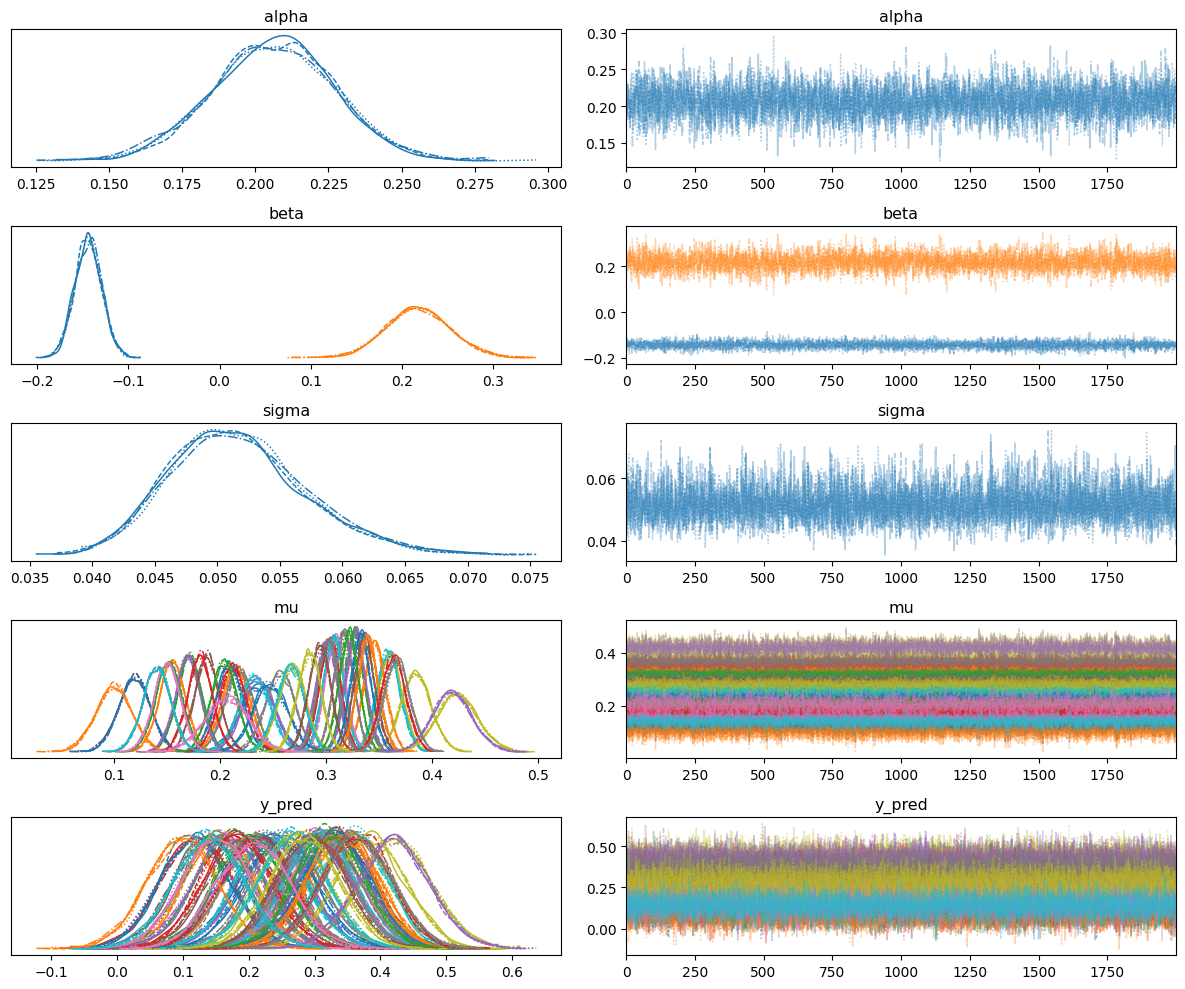

In [23]:
az.plot_trace(cmdstanpy_data, compact=True)
plt.tight_layout()
plt.show()

array([<Axes: title={'center': 'beta\n0'}>,
       <Axes: title={'center': 'beta\n1'}>,
       <Axes: title={'center': 'sigma'}>], dtype=object)

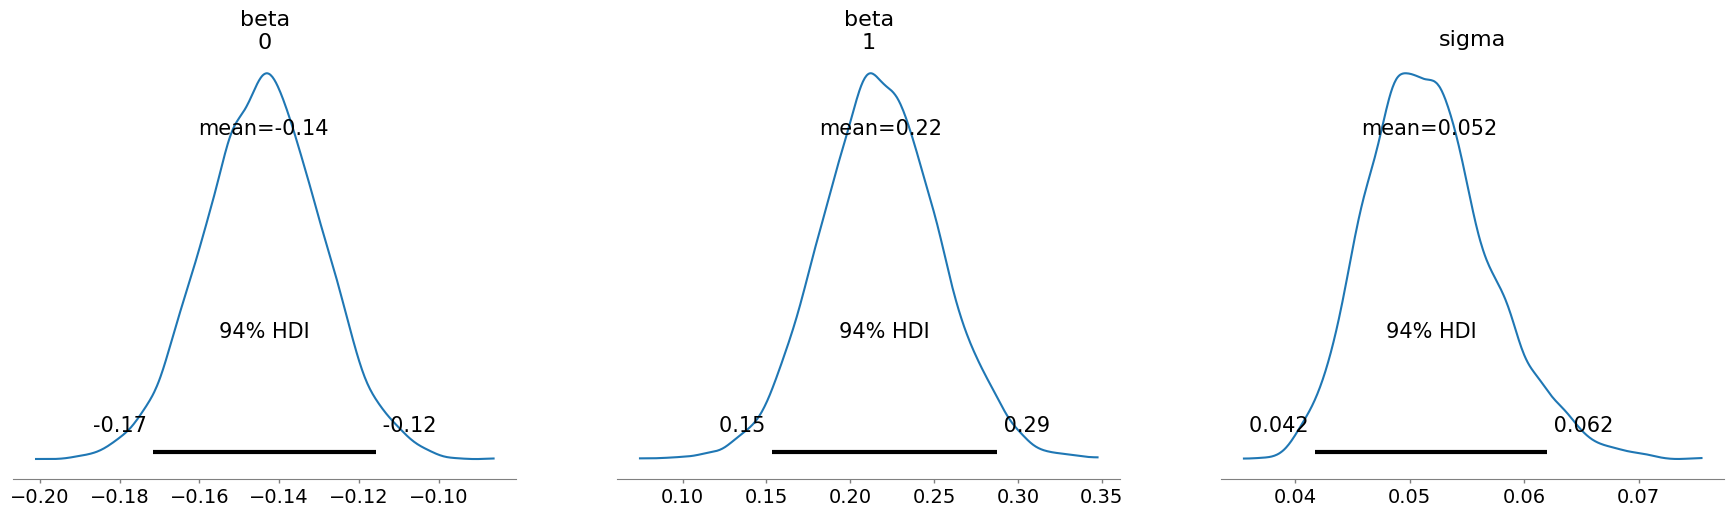

In [27]:
az.plot_posterior(cmdstanpy_data, var_names=["beta", "sigma"])

In [44]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,120.864000,0.027279,1.451900,118.052000,121.182000,122.558000,2832.820000,3929.01000,1.000820
alpha,0.206243,0.000358,0.021068,0.171173,0.206456,0.240498,3454.960000,4791.89000,0.999967
beta[1],-0.144092,0.000200,0.014810,-0.168239,-0.144000,-0.119887,5479.210000,7599.46000,1.000940
beta[2],0.217907,0.000597,0.035739,0.160341,0.217231,0.277963,3583.410000,4970.06000,0.999756
sigma,0.051702,0.000073,0.005429,0.043621,0.051266,0.061459,5500.300999,7628.71151,1.000585
...,...,...,...,...,...,...,...,...,...
y_pred[46],0.294125,0.000582,0.052386,0.209097,0.294324,0.379330,8115.130000,11255.40000,0.999921
y_pred[47],0.207378,0.000650,0.055293,0.116347,0.208141,0.297322,7233.200000,10032.20000,0.999608
y_pred[48],0.366253,0.000605,0.052690,0.280424,0.365117,0.453806,7581.200000,10514.80000,0.999858
y_pred[49],0.284396,0.000613,0.053430,0.195716,0.284570,0.372642,7609.590000,10554.20000,0.999953


In [43]:
cmdstanpy_data.posterior["beta"].values.mean(0).mean(0)

array([-0.14409183,  0.21790724])

In [52]:
y_pred_arr = cmdstanpy_data.posterior["y_pred"].values
y_pred_mean = y_pred_arr.mean(0).mean(0)

In [76]:
y_pred_lower, y_pred_upper = np.quantile(y_pred_arr, q=[0.05,0.95], axis=[0,1])

In [77]:
y_pred_mean

array([0.2352682 , 0.21550345, 0.32700161, 0.1186221 , 0.23538707,
       0.34038689, 0.30328843, 0.21702668, 0.36033089, 0.35903638,
       0.20781324, 0.34617482, 0.1707467 , 0.30313646, 0.2991868 ,
       0.13914382, 0.30738449, 0.25694957, 0.4237419 , 0.23184856,
       0.11903549, 0.15537506, 0.15100105, 0.21135913, 0.16887287,
       0.18770739, 0.31568666, 0.31644941, 0.38490355, 0.30728694,
       0.24727045, 0.09941095, 0.20303436, 0.1808432 , 0.32837518,
       0.33603502, 0.14937618, 0.30144376, 0.26718511, 0.26621169,
       0.33343935, 0.33932739, 0.32225319, 0.36331871, 0.41967475,
       0.29412506, 0.20737762, 0.3662531 , 0.28439582, 0.13910181])

In [78]:
df_summary = fit.summary()
df_summary.loc[df_summary.index.str.contains("y_pred"), :].head()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
y_pred[1],0.235268,0.000642,0.054416,0.145357,0.235788,0.325500,7191.79,9974.74,0.999911
y_pred[2],0.215503,0.000602,0.053133,0.129461,0.215096,0.301843,7796.37,10813.30,1.000000
y_pred[3],0.327002,0.000597,0.053074,0.238523,0.327408,0.413060,7912.12,10973.80,0.999942
y_pred[4],0.118622,0.000634,0.053874,0.030303,0.118686,0.205842,7210.03,10000.00,0.999901
y_pred[5],0.235387,0.000608,0.054180,0.146867,0.234781,0.324735,7948.21,11023.90,0.999928


In [79]:
idx = y_pred_mean.argmin()

In [80]:
y_pred_mean[idx], y_pred_lower[idx], y_pred_upper[idx]

(0.0994109470736375, 0.01004698, 0.18883059999999985)

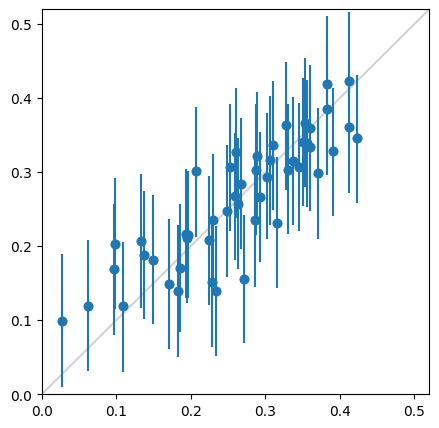

In [86]:
plt.figure(figsize=(5,5))
plt.scatter(df["Y"], y_pred_mean)
plt.errorbar(df["Y"], y_pred_mean, yerr=[y_pred_mean-y_pred_lower, y_pred_upper-y_pred_mean], fmt="o", zorder=2)
plt.plot([0,0.52],[0,0.52], color="lightgray", zorder=1)
plt.xlim(0,0.52)
plt.ylim(0,0.52)
plt.show()